In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

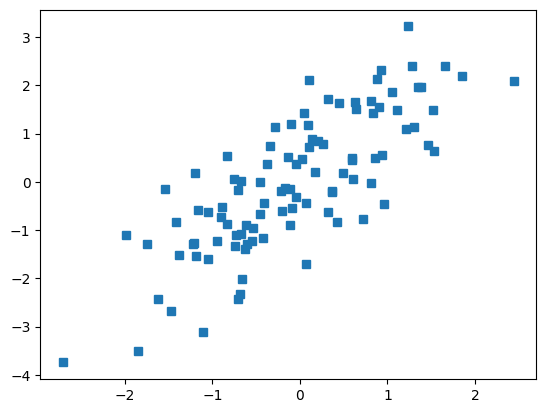

In [6]:
# create data

N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# and plot
plt.plot(x, y, "s")
plt.show()

In [7]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer; (1, 1) = takes one input(x) and produces one output(input of 2nd linear function) 
    nn.ReLU(), # activation function
    nn.Linear(1, 1) # output layer (1, 1) = takes one input(output  of first linear function) and produces one output(y)
)

In [8]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [9]:
# select training data (note te hard-coded N)
trainidx = np.random.choice(range(N), 80, replace = False) # random indices
trainBool = np.zeros(N, dtype = bool) # initialize vector of falses
trainBool[trainidx] = True # set selected samples to true

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [10]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# train the model
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x[trainBool])

    # compute loss
    loss = lossfun(yHat, y[trainBool])
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [18]:
# report the losses
import torch.nn.functional as F

# compute losses of the test set
predYtest = ANNreg(x[~trainBool])

# Compute test loss using Mean Squared Error
testloss = F.mse_loss(predYtest, y[~trainBool])

# print out final Train loss and Test loss
print(f"Final TRAIN loss: {loss.detach():.2f}")
print(f"Final TEST loss: {testloss.detach():.2f}")

Final TRAIN loss: 0.78
Final TEST loss: 0.97


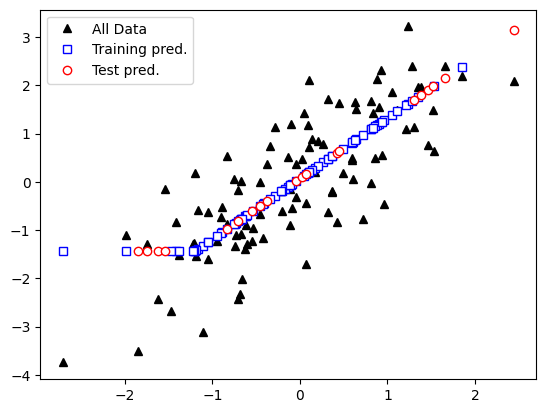

In [19]:
# plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x, y, "k^", label = "All Data")
plt.plot(x[trainBool], predYtrain, "bs", markerfacecolor = "w", label = "Training pred.")
plt.plot(x[~trainBool], predYtest.detach(), "ro", markerfacecolor = "w", label = "Test pred.")
plt.legend()
plt.show()